<h1 style="text-align:center">ASI assessed Exercise 2016/2017</h1>
<h2 style="text-align:center">Luca BENEDETTO</h2>

In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt

from pydataset import data
import matplotlib.mlab as mlab
import math

<div style="background-color:rgb(0, 155, 10) !important; color:white; text-align: center; padding:5px 5px 15px 5px; border-radius: 30px">
    <h2>Download the MNIST and CIFAR10 datasets and import them</h2>
</div>

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>MNIST</font></h3>
</div>

In [2]:
mnist_data = MNIST('.')
mnist_train_data, mnist_train_label = mnist_data.load_training()
mnist_test_data, mnist_test_label = mnist_data.load_testing()

print("MNIST - Number of training images:", len(mnist_train_data))
print("MNIST - Number of testing images:", len(mnist_test_data))

MNIST - Number of training images: 60000
MNIST - Number of testing images: 10000


In [3]:
mnist_train_data_separated = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
for i in np.arange(len(mnist_train_data)):
    mnist_train_data_separated[mnist_train_label[i]].append(mnist_train_data[i])

The dictionary just defined is the dictionary that I am going to use in the training phase, I have reorganized the training set in order to have all the images grouped by label.

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>CIFAR</font></h3>
</div>

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
cifar_dict1 = unpickle('./cifar-10-batches-py/data_batch_1')
cifar_dict2 = unpickle('./cifar-10-batches-py/data_batch_2')
cifar_dict3 = unpickle('./cifar-10-batches-py/data_batch_3')
cifar_dict4 = unpickle('./cifar-10-batches-py/data_batch_4')
cifar_dict5 = unpickle('./cifar-10-batches-py/data_batch_5')
cifar_dict_test = unpickle('./cifar-10-batches-py/test_batch')

Each dictionary is made of several fields:
- `data` contains an array of 10.000 arrays, each one of the internal arrays is an image, with size 3072 (32x32x3)
- `filenames` is an array containing the names of the files where the images are stored
- `labels` is an array containing the correct label for each image

Working on five different `dict` is not handy, thus I put everything into a single `dict` variable.

In [6]:
#define the new dict
cifar_train = {}

#concatenate data
cifar_train['data'] = np.concatenate([cifar_dict1[b'data'], cifar_dict2[b'data'], cifar_dict3[b'data'], 
                                      cifar_dict4[b'data'], cifar_dict5[b'data']])
#concatenate labels
cifar_train['labels'] = np.concatenate([cifar_dict1[b'labels'],cifar_dict2[b'labels'],cifar_dict3[b'labels'],
                                     cifar_dict4[b'labels'],cifar_dict5[b'labels']])

cifar_test = {}
cifar_test['data'] = cifar_dict_test[b'data']
cifar_test['labels'] = cifar_dict_test[b'labels']

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Also for CIFAR10 I use the same approach with a dictionary, I used in MNIST.

In [7]:
cifar_train_data_separated = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
for i in np.arange(len(cifar_train['data'])):
    cifar_train_data_separated[cifar_train['labels'][i]].append(cifar_train['data'][i])

<div style="background-color:rgb(0, 155, 10) !important; color:white; text-align: center; padding:5px 5px 15px 5px; border-radius: 30px">
    <h2><font color='white'>Comment on the distribution of class labels and the dimensionality of the input and how these may affect the analysis.</font></h2>
</div>

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>MNIST</font></h3>
</div>

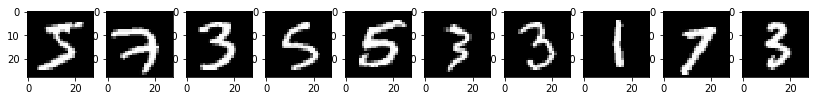

In [8]:
c = 10
ax = []
fig, ax = plt.subplots(1,c, figsize=(14,4))
for i in range(c):
    image = np.array(mnist_train_data[5000*i]).reshape(28,28)
    ax[i].imshow(image, cmap='gray')
plt.show()

In [9]:
print("Size of each image:", len(mnist_train_data[0]))

Size of each image: 784


The size of each image is 28x28, and we have in total 70.000 images (60.000 in the training set and 10.000 in the test set).

### Distribution

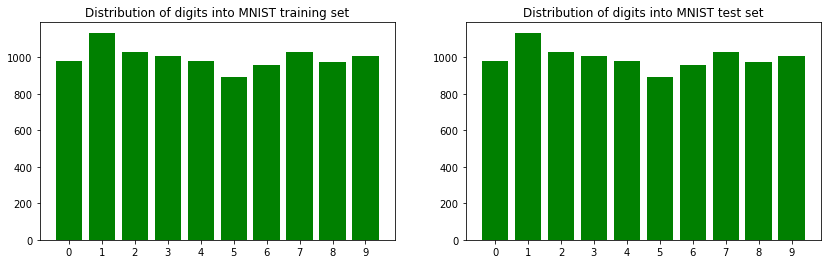

In [10]:
digit_cnt_tr = np.zeros(10)
for item in mnist_test_label:
    digit_cnt_tr[item] += 1

digit_cnt_te = np.zeros(10)
for item in mnist_test_label:
    digit_cnt_te[item] += 1

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))

ax1.bar(np.arange(len(digit_cnt_tr)), digit_cnt_tr, color='green')
ax1.set_xticks(np.arange(len(digit_cnt_tr)))
ax1.set_title('Distribution of digits into MNIST training set')

ax2.bar(np.arange(len(digit_cnt_te)), digit_cnt_te, color='green')
ax2.set_xticks(np.arange(len(digit_cnt_te)))
ax2.set_title('Distribution of digits into MNIST test set')

plt.show()

The different labels in the training set are not uniformly distributed and this could affect the prediction, since the model will learn that the label `1` is more likely than the others and thus the labels will have different priors. Moreover, this difference between the presence of the different labels is not small, for instance between label `1` and label `5` is more than 1.000.

Anyway, if we look at the distribution of labels in the test set we can observe that it is very similar to the distribution we have into the training set, with only minor differences (label `2` and `3` for instance). Thus, the not-uninform distribution of the training set probably will not have huge effects on this specific test set (but it could have effect on a balanced one).

### Mean

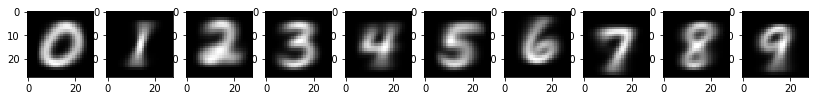

In [11]:
digit_mean = [ np.mean(mnist_train_data_separated[i],axis=0) for i in range(10) ]

ax = []
fig, ax = plt.subplots(1,c, figsize=(14,4))
for i in range(c):
    image = digit_mean[i].reshape(28,28)
    ax[i].imshow(image, cmap='gray')
plt.show()

### Variance

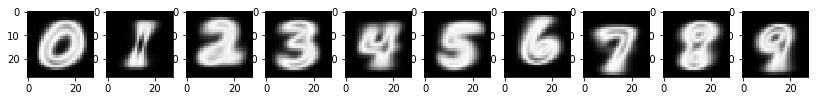

In [12]:
digit_var = [ np.var(mnist_train_data_separated[i],axis=0) for i in range(10) ]

ax = []
fig, ax = plt.subplots(1,c, figsize=(14,4))
for i in range(c):
    image = digit_var[i].reshape(28,28)
    ax[i].imshow(image, cmap='gray')
plt.show()

### Standard deviation

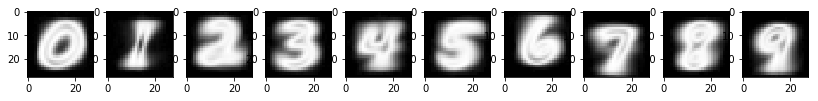

In [13]:
digit_std = [ np.std(mnist_train_data_separated[i],axis=0) for i in range(10) ]

ax = []
fig, ax = plt.subplots(1,c, figsize=(14,4))
for i in range(c):
    image = digit_std[i].reshape(28,28)
    ax[i].imshow(image, cmap='gray')
plt.show()

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>CIFAR</font></h3>
</div>

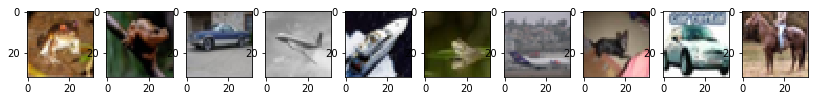

In [14]:
ax = []
fig, ax = plt.subplots(1,c,figsize=(14,4))
for i in range(c):
    image = cifar_train['data'][5000*i].reshape(3,32,32)
    image = image.transpose(1,2,0)
    ax[i].imshow(image)
plt.show()

In [15]:
print("Number of images training set:", len(cifar_train['data']))
print("Number of images test set:", len(cifar_test['data']))
print("Size of each image:", len(cifar_train['data'][0]))

Number of images training set: 50000
Number of images test set: 10000
Size of each image: 3072


We have 50.000 images into the training set and 10.000 into the test set, each image has size 3072, that is 32x32x3 (three channels because they are coloured).

### Distribution

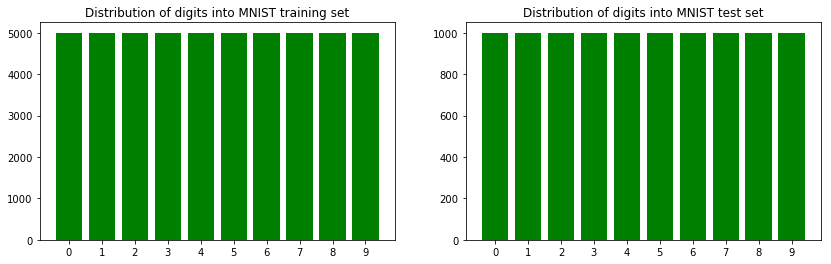

In [16]:
cifar_cnt_tr = [0,0,0,0,0,0,0,0,0,0]
for item in cifar_train['labels']:
    cifar_cnt_tr[item] += 1
cifar_cnt_te = [0,0,0,0,0,0,0,0,0,0]
for item in cifar_test['labels']:
    cifar_cnt_te[item] += 1

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))

ax1.bar(np.arange(len(cifar_cnt_tr)), cifar_cnt_tr, color='green')
ax1.set_xticks(np.arange(len(cifar_cnt_tr)))
ax1.set_title('Distribution of digits into MNIST training set')

ax2.bar(np.arange(len(cifar_cnt_te)), cifar_cnt_te, color='green')
ax2.set_xticks(np.arange(len(cifar_cnt_te)))
ax2.set_title('Distribution of digits into MNIST test set')

plt.show()

In this case we don't have the problem that we had into the MNIST training set, because each label is present the same amount of times both in the training set and in the test set and the priors will be equal.

### Mean

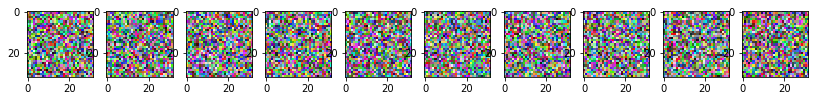

In [17]:
image_mean = [ np.mean(cifar_train_data_separated[i],axis=0) for i in range(10) ]

ax = []
fig, ax = plt.subplots(1,c, figsize=(14,4))
for i in range(c):
    image = image_mean[i].reshape(32,32,3)
    ax[i].imshow(image)
plt.show()

It is interesting to notice how the mean (and variance and standard deviation as well) for the cifar dataset looks really meaningless for us (it will obviously be meaningful for the model), while in the mnist set we could see something. This is due to the three layers that compose each image: while performing the mean we lose all the features that our eyes could understand.

### Variance

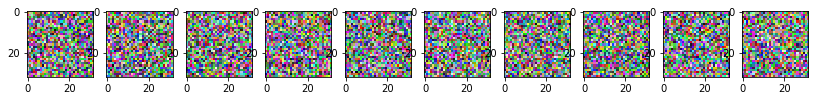

In [18]:
image_var = [ np.var(cifar_train_data_separated[i],axis=0) for i in range(10) ]

ax = []
fig, ax = plt.subplots(1,c, figsize=(14,4))
for i in range(c):
    image = image_var[i].reshape(32,32,3)
    ax[i].imshow(image)
plt.show()

### Standard deviation

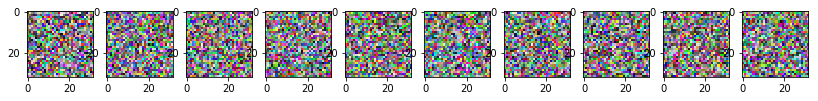

In [19]:
image_std = [ np.std(cifar_train_data_separated[i],axis=0) for i in range(10) ]
ax = []
fig, ax = plt.subplots(1,c, figsize=(14,4))
for i in range(c):
    image = image_std[i].reshape(32,32,3)
    ax[i].imshow(image)
plt.show()

<div style="background-color:rgb(0, 155, 10) !important; color:white; text-align: center; padding:5px 5px 15px 5px; border-radius: 30px">
    <h2><font color='white'>Implement the Naive Bayes classifier</font></h2>
</div>

In [20]:
from scipy.stats import multivariate_normal as mvn

def generatePriors(data):
    priors = dict()
    total = 0  
    for class_n, images in data.items():
        priors[class_n] = len(images)
        total += len(images)
    for class_n in priors:
        priors[class_n] = priors[class_n]/total
    return priors

def generateGaussians(data):
    gaussians = dict()
    for c, items in data.items():
        gaussians[c] = {
            'mean': np.mean(items, axis=0),
            'var': np.var(items, axis=0),
        }
    return gaussians

def predict(X, gaussians, priors):
        N, D = X.shape
        K = len(gaussians)
        P = np.zeros((N, K))
        print("Starting prediction...")
        for c, g in gaussians.items():
            #print('Working on class %d...' %c)
            mean, var = g['mean'], g['var']
            P[:,c] = np.log(priors[c]) + mvn.logpdf(X, mean=mean, cov=var, allow_singular=True)
        return np.argmax(P, axis=1)

<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Describe a positive and a negative feature of the classifier for these tasks</font></h3>
</div>

The Naive Bayesian classifier is a pretty simple classifier, since it makes strong independent assumptions between the features, and this is certainly a limit since in our case we are considering images and it is very likely that the characteristics of a point are related to those of his neighbors. When this assumption does not hold, it strongly limits the accuracy reachable with this classifier, since labels that violate the most this assumption would be preferred over the other ones. 
<br>
On the other hand, its simplicity makes this classifier really fast and it can lead to quite good  results, even in the case the independence assumption does not hold. 
<br>
<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Describe any preprocessing that you suggest for this data and your classifier</font></h3>
</div>

This type of classifier could have some problems when the classes into the training set are not balanced: it will learn that some labels are more likely to appear with respect to the others and thus their prior will be different. This could lead to a biased classifier that would prefer one or few labels over the others and, in case the distribution of the labels "in the real world" is not the same as the one of the training set, we could have worse performances. This is for instance the case for the MNIST dataset we are working on.
<br>
Thus, one possible operation to perform on the dataset is to remove some of the training entries in order to balance the different classes.

Another possible preprocessing operation to perform consists in removing the outliers in the training set: if we have a couple of samples that are way different from most of the others of the same class, it could be a good idea to remove them, otherwise the classifier could learn some feature that are due to noise or similar problems.
<br>
<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Apply your classifier to the two given datasets</font></h3>
</div>

Before implementing the optimizations, I use the classifier on the datasets as they are to check the actual improvement we reach with the optimization.

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>MNIST</font></h3>
</div>

In [21]:
def score(predictions, labels):
    """
    Function that computes the accuracy of the classifier, 
    returning the fraction of entries that have been correctly classified
    """
    num_success =0
    total = len(labels)
    for i, class_predicted in enumerate(predictions):
        if labels[i] == class_predicted:
            num_success +=1
    return num_success/total

In [22]:
from datetime import datetime

t0 = datetime.now()

mnist_priors = generatePriors(mnist_train_data_separated)
mnist_gaussians = generateGaussians(mnist_train_data_separated)

print ("Training time:", (datetime.now() - t0))

Training time: 0:00:05.148535


In [23]:
t0 = datetime.now()
mnist_predictions = predict(np.array(mnist_test_data), mnist_gaussians, mnist_priors)
print("Predicting time:", (datetime.now() - t0))

Starting prediction...
Predicting time: 0:00:05.125553


In [24]:
print("The accuracy of the classifier for the MNIST dataset is", score(mnist_predictions, mnist_test_label)*100, "%" )

The accuracy of the classifier for the MNIST dataset is 64.83 %


### Optimizations

In [25]:
def removeOutliers(data, margin):
    new_data = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
    for c, items in data.items():
        mean = np.mean(items, axis=0)
        for image in items:
            valid = True
            for i in range(len(image)):
                if  (image[i] - mean[i]) < -margin or (image[i] - mean[i]) > margin:
                    valid = False
            if valid:
                new_data[c].append(image)
    return new_data

In [26]:
optimized_mnist_train_data_separated = removeOutliers(mnist_train_data_separated, 230)

print("Num of images per class before & after optimization:\t")
for i in range(10):
    print("- class", i, ":", len(mnist_train_data_separated[i]), "->", len(optimized_mnist_train_data_separated[i]))

Num of images per class before & after optimization:	
- class 0 : 5923 -> 3284
- class 1 : 6742 -> 4540
- class 2 : 5958 -> 2353
- class 3 : 6131 -> 2933
- class 4 : 5842 -> 2471
- class 5 : 5421 -> 2617
- class 6 : 5918 -> 3622
- class 7 : 6265 -> 2757
- class 8 : 5851 -> 3397
- class 9 : 5949 -> 3450


We have removed a lot of points, even though the threshold chosen was really "soft".

In [27]:
t0 = datetime.now()
optimized_mnist_priors = generatePriors(optimized_mnist_train_data_separated)
optimized_mnist_gaussians = generateGaussians(optimized_mnist_train_data_separated)
print ("Training time:", (datetime.now() - t0))
optimized_mnist_predictions = predict(np.array(mnist_test_data), optimized_mnist_gaussians, optimized_mnist_priors)
print("Accuracy of the optimized classifier for MNIST:", score(optimized_mnist_predictions, mnist_test_label)*100, "%" )

Training time: 0:00:02.695456
Starting prediction...
Accuracy of the optimized classifier for MNIST: 71.73 %


We have had an improvement, and it is actually interesting to notice that we can obtain better results with a smaller training set if the elements inside the set are representing each class in a better way.

Now let's try to balance the classes.

In [28]:
def balanceClasses(data):
    new_data = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}   
    min = 99999
    for c, items in data.items():
        if len(items) < min:
            min = len(items)    
    for c, items in data.items():
        for image in items:
            if len(new_data[c]) < min:
                new_data[c].append(image)
    return new_data

In [29]:
balanced_mnist_train_data_separated = balanceClasses(optimized_mnist_train_data_separated)

print("Num of images per class before & after optimization:\t")
for i in range(10):
    print("- class", i, ":", len(optimized_mnist_train_data_separated[i]),\
          "->", len(balanced_mnist_train_data_separated[i]))

Num of images per class before & after optimization:	
- class 0 : 3284 -> 2353
- class 1 : 4540 -> 2353
- class 2 : 2353 -> 2353
- class 3 : 2933 -> 2353
- class 4 : 2471 -> 2353
- class 5 : 2617 -> 2353
- class 6 : 3622 -> 2353
- class 7 : 2757 -> 2353
- class 8 : 3397 -> 2353
- class 9 : 3450 -> 2353


With this step, we really removed a lot of elements from the training set, let's see the effects...

In [30]:
t0 = datetime.now()
balanced_mnist_priors = generatePriors(balanced_mnist_train_data_separated)
balanced_mnist_gaussians = generateGaussians(balanced_mnist_train_data_separated)
print ("Training time:", (datetime.now() - t0))
balanced_mnist_predictions = predict(np.array(mnist_test_data), balanced_mnist_gaussians, balanced_mnist_priors)
print("Accuracy of optimized classifier for MNIST:", score(balanced_mnist_predictions, mnist_test_label)*100, "%" )

Training time: 0:00:01.994431
Starting prediction...
Accuracy of optimized classifier for MNIST: 72.15 %


In this case the improvement was smaller than the previous one but, still, we managed to get a better model. It is also interesting to notice that the distance I used to remove outliers is pretty simple: I do not look at the overall distance from the mean but the distance pixel-by-pixel. This approach could look pretty simple but it actually led me to a slightly better result than the one obtained with the euclidean distance (trying with many different thresholds).

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>CIFAR</font></h3>
</div>

In [31]:
t0 = datetime.now()

cifar_priors = generatePriors(cifar_train_data_separated)
cifar_gaussians = generateGaussians(cifar_train_data_separated)

print ("Training time:", (datetime.now() - t0))

Training time: 0:00:01.247648


In [32]:
t0 = datetime.now()
cifar_predictions = predict(np.array(cifar_test['data']), cifar_gaussians, cifar_priors)
print("Predicting time:", (datetime.now() - t0))

Starting prediction...
Predicting time: 0:01:47.037974


In [33]:
print("The accuracy of the classifier CIFAR10 is: %.2f"%(score(cifar_predictions, cifar_test['labels'])*100), "%")

The accuracy of the classifier CIFAR10 is: 29.76 %


We can see that in this case the obtained result is pretty bad, let's try to improve it...

### Optimizations

In [34]:
optimized_cifar_train_data_separated = removeOutliers(cifar_train_data_separated, 180)

print("Num of images per class before & after optimization:\t")
for i in range(10):
    print("- class", i, ":", len(cifar_train_data_separated[i]), "->", len(optimized_cifar_train_data_separated[i]))

Num of images per class before & after optimization:	
- class 0 : 5000 -> 4948
- class 1 : 5000 -> 5000
- class 2 : 5000 -> 5000
- class 3 : 5000 -> 5000
- class 4 : 5000 -> 5000
- class 5 : 5000 -> 5000
- class 6 : 5000 -> 5000
- class 7 : 5000 -> 5000
- class 8 : 5000 -> 4972
- class 9 : 5000 -> 4898


In [35]:
t0 = datetime.now()
optimized_cifar_priors = generatePriors(optimized_cifar_train_data_separated)
optimized_cifar_gaussians = generateGaussians(optimized_cifar_train_data_separated)
print ("Training time:", (datetime.now() - t0))
optimized_cifar_predictions = predict(np.array(cifar_test['data']), optimized_cifar_gaussians, optimized_cifar_priors)
print("Accuracy of optimized classifier for CIFAR10:", score(optimized_cifar_predictions, cifar_test['labels'])*100, "%" )

Training time: 0:00:01.421757
Starting prediction...
Accuracy of optimized classifier for CIFAR10: 29.82 %


In [36]:
bal_opt_cifar_train_data_separated = balanceClasses(optimized_cifar_train_data_separated)

print("Num of images per class before & after optimization:\t")
for i in range(10):
    print("- class", i, ":", len(optimized_cifar_train_data_separated[i]),\
          "->", len(bal_opt_cifar_train_data_separated[i]))

Num of images per class before & after optimization:	
- class 0 : 4948 -> 4898
- class 1 : 5000 -> 4898
- class 2 : 5000 -> 4898
- class 3 : 5000 -> 4898
- class 4 : 5000 -> 4898
- class 5 : 5000 -> 4898
- class 6 : 5000 -> 4898
- class 7 : 5000 -> 4898
- class 8 : 4972 -> 4898
- class 9 : 4898 -> 4898


In [37]:
t0 = datetime.now()
bal_opt_cifar_priors = generatePriors(bal_opt_cifar_train_data_separated)
bal_opt_cifar_gaussians = generateGaussians(bal_opt_cifar_train_data_separated)
print ("Training time:", (datetime.now() - t0))
bal_opt_cifar_predictions = predict(np.array(cifar_test['data']), bal_opt_cifar_gaussians, bal_opt_cifar_priors)
print("Accuracy of optimized classifier for CIFAR10:", score(bal_opt_cifar_predictions, cifar_test['labels'])*100, "%" )

Training time: 0:00:01.512742
Starting prediction...
Accuracy of optimized classifier for CIFAR10: 29.81 %


In this case the improvement obtained with the optimizations is really small, way smaller than the one I got for the MNIST dataset, this is mainly due to the fact that the CIFAR dataset is a more complex one compared to MNIST and the number of entries we have in the datset is not big enough.

<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Display the confusion matrix on the test data</font></h3>
</div>

In [38]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(true_label, prediction, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens):
    
    cm = confusion_matrix(true_label, prediction)
    np.set_printoptions(precision=2)

    plt.figure(figsize=(7,7))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, math.ceil(cm[i, j]*10000)/10000,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>MNIST</font></h3>
</div>

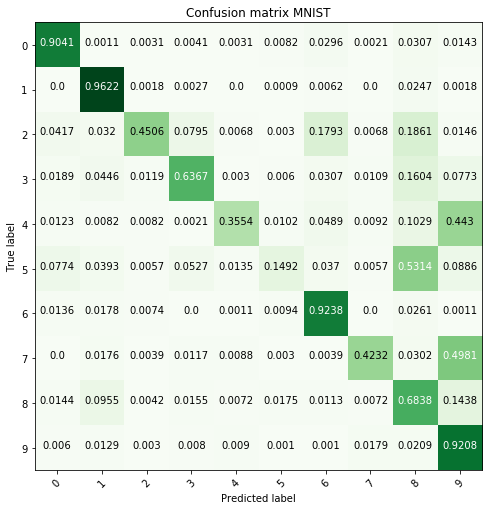

In [39]:
plot_confusion_matrix(list(mnist_test_label),mnist_predictions,range(10), normalize=True, title='Confusion matrix MNIST')

<div style="border-bottom-style: dotted; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>CIFAR</font></h3>
</div>

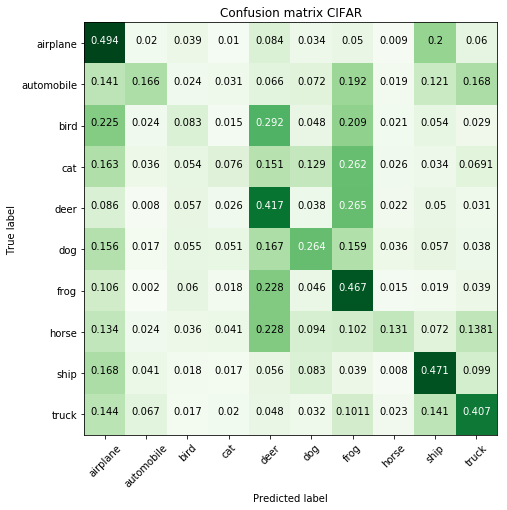

In [40]:
plot_confusion_matrix(cifar_test['labels'],cifar_predictions,cifar_labels, normalize=True, title='Confusion matrix CIFAR')

From the confusion matrixes we can see again the huge difference between the performances of the Naive Bayesian Classifier used on the MNIST dataset and the CIFAR10 dataset: while in the first case we can see that the elements on the diagonal have higher values than the other ones, in the CIFAR10 this behaviour is barely visible: for instance the 'airplane' label is assigned wrongly many times while the 'horse' label is almost never assigned.

<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Discuss  the  performance,  compare  them  against  a  classifier  that  outputs random class labels, and suggest ways in which performance could be improved</font></h3>
</div>

As I already mentioned, the Naive Bayesian Classifier is a very simple model, since it assumes independence between the different features of the elements it is working on, and this very simple (and limited) behaviour is clearly visible from the results obtained over the two considered datasets. In the case of CIFAR10 we obtain an accuracy around 30% that is of course better than a random classifiers (it'd reach 10%) but it is definetely not realiable and it couldn't be used in a scenario where the result of the classification is critical.
<br>
In the case of MNIST, instead, the results are way better than a random classifier (72% vs. 10%) but, since the s.o.a. for the MNIST dataset is over 99%, it is fair to say that this classifier is far away from "good performances".

This poor performances are mainly due to the independence assumption made by the classifier, since in this case it does not hold: indeed, the value of each pixel strongly depends on the value of the neighbors and ignoring this aspect causes a big "blind spot" in the classifier.

Other than the optimizations already implemented it could be very useful, in order to improve the performances, to have a bigger dataset, especially for CIFAR10: indeed, we were performing training with only 50.000 images and each of them had more than 3.000 pixels, while in the case of MNIST we had 60.000 images with only 784 pixels each! It is reasonable that the model didn't manage to learn all those features in a reliable way having only such a small number of images available.

<div style="background-color:rgb(0, 155, 10) !important; color:white; text-align: center; padding:5px 5px 15px 5px; border-radius: 30px">
    <h2><font color='white'>Implement Bayesian linear regression</font></h2>
</div>

In [41]:
def generateX(train_data, randomize=False, verbose=False, name=None):
    X = train_data
    if randomize:
        X += np.random.randn(len(X), len(X[0])) * 0.01
    X = np.hstack( (np.array([np.ones(len(X))]).T, X ))
    if verbose:
        print("New shape",name,"training set:", np.shape(X))
    return X

def generateXtX(X, sigma, verbose=False, name=None):
    XtX = np.dot(X.T, X)/sigma
    if verbose:
        print("Shape XtX", name, ":", np.shape(XtX))
    return XtX

def genW_hat(train_data, train_label, sigma, randomize=False, verbose=False, name=None):
    X = generateX(train_data, randomize=randomize, verbose=verbose, name=name)
    XtX = generateXtX(X, sigma, verbose=verbose, name=name)
    w_hat = np.linalg.inv(XtX).dot(X.T).dot(train_label)/sigma
    if verbose:
        print("Shape w_hat", name, ":", np.shape(w_hat))
    return w_hat

def w_hat_predict(test_data, w_hat):
    return np.dot(np.hstack(((np.array([np.ones(len(test_data))])).T, test_data)), w_hat)

<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Treat class labels as continuous and apply regression to the training data</font></h3>
</div>

In [42]:
mnist_w_hat = genW_hat(mnist_train_data, mnist_train_label, 0.05, randomize=True, verbose=True, name="MNIST")

New shape MNIST training set: (60000, 785)
Shape XtX MNIST : (785, 785)
Shape w_hat MNIST : (785,)


In [43]:
cifar_w_hat = genW_hat(cifar_train['data'], cifar_train['labels'], 0.05, randomize=False, verbose=True, name="CIFAR")

New shape CIFAR training set: (50000, 3073)
Shape XtX CIFAR : (3073, 3073)
Shape w_hat CIFAR : (3073,)


In [44]:
mnist_predicted = w_hat_predict(mnist_test_data, mnist_w_hat)
cifar_predicted = w_hat_predict(cifar_test['data'], cifar_w_hat)

<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Produce a  scatter  plot showing the  predictions  versus  the  true  targets  for  the test set and compute the mean squared error on the test set</font></h3>
</div>

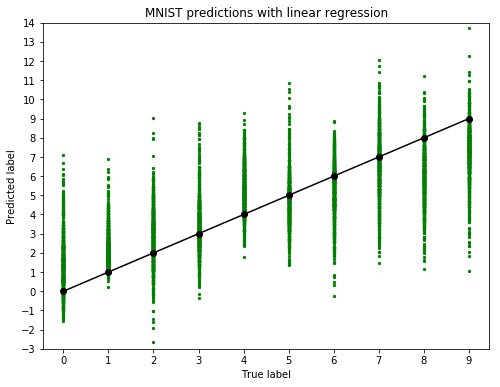

In [45]:
# Distribution of labels in MNIST
plt.figure(figsize=(8, 6))
plt.scatter(mnist_test_label, mnist_predicted, s=5, c='green')
plt.plot(np.arange(0,10), np.arange(0,10), 'k-o')
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(-3,15))
plt.ylim(-3,14)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('MNIST predictions with linear regression')
plt.show()

In the scatter plot I limited the y value because I had three points that were very far from all the others and made the plot really small.

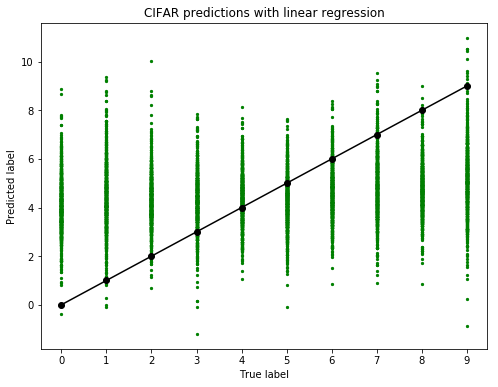

In [46]:
# Distribution of labels in CIFAR
plt.figure(figsize=(8, 6))
plt.scatter(cifar_test['labels'], cifar_predicted, s=5, c='green')
plt.plot(np.arange(0,10), np.arange(0,10), 'k-o')
plt.xticks(np.arange(0,10))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('CIFAR predictions with linear regression')
plt.show()

We can immediately notice that the prediction is very bad in both cases, especially in CIFAR, where the distribution of predicted labels does not match at all the shape of the line.

In [47]:
def MSE(predicted_labels, target_labels):
    error = 0
    for p, t in zip(predicted_labels, target_labels):
        error += np.square(p-t)
    return error/len(predicted_labels)

In [48]:
print("Mean square error for MNIST:", MSE(mnist_predicted, mnist_test_label))
print("Mean square error for CIFAR:", MSE(cifar_predicted, cifar_test['labels']))

Mean square error for MNIST: 3.27090144278
Mean square error for CIFAR: 8.03262844765


<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Suggest a way to discretize predictions and display the confusion matrix on the test data and report accuracy</font></h3>
</div>

The way I chose to discretize the predictions consists in rounding the predicted value to the closest integer, limiting this rounding into the interval [0;9], since we had some negative values and some values bigger than 9.5.

In [49]:
def discretizePredictions(predicted_labels):
    for i,p in enumerate(predicted_labels):
        if p > 9:
            predicted_labels[i] = 9
        elif p < 0:
            predicted_labels[i] = 0
        else:
            predicted_labels[i] = round(p)
    return predicted_labels

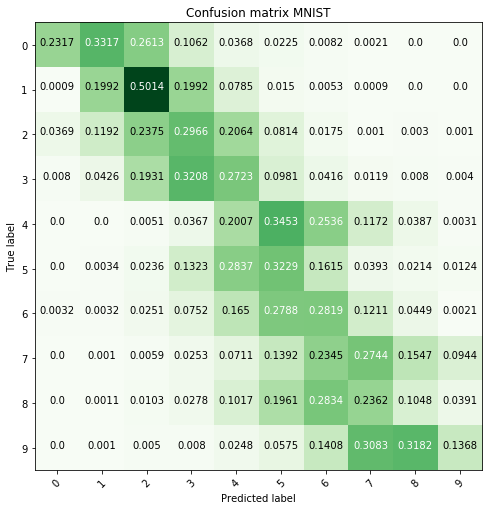

In [50]:
mnist_discretized_predicted = discretizePredictions(mnist_predicted)
plot_confusion_matrix(list(mnist_test_label),mnist_discretized_predicted,\
                      range(10), normalize=True, title='Confusion matrix MNIST')

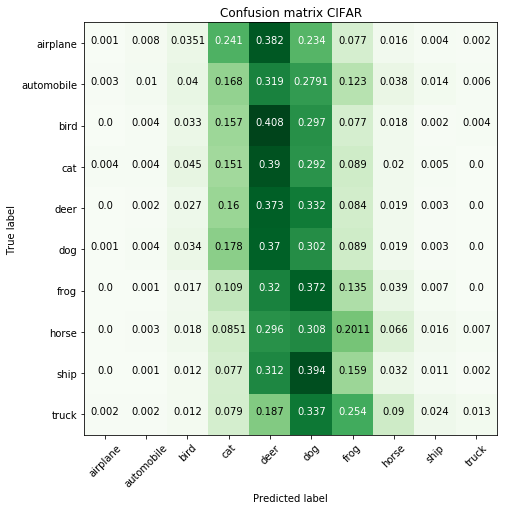

In [51]:
cifar_discretized_predicted = discretizePredictions(cifar_predicted)
plot_confusion_matrix(cifar_test['labels'],cifar_discretized_predicted,\
                      cifar_labels, normalize=True, title='Confusion matrix CIFAR')

In [52]:
print("The accuracy with linear regrssion for the MNIST dataset is",\
      score(mnist_discretized_predicted, mnist_test_label)*100, "%" )
print("The accuracy with linear regrssion for the CIFAR dataset is",\
      score(cifar_discretized_predicted, cifar_test['labels'])*100, "%" )

The accuracy with linear regrssion for the MNIST dataset is 22.99 %
The accuracy with linear regrssion for the CIFAR dataset is 10.95 %


<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Discuss regression performance with respect to classification performance</font></h3>
</div>

This method led us to very bad results: for the MNIST dataset we obtained around 23.01% accuracy, that is slightly better than a random classifier, while for the CIFAR dataset we got 10% accuracy and there wouldn't be any sense in using such a classifier since it has the same performances as a random one.
<br>
The problem is that we apply regression directly against the labels and in this way we assume a linear relationship between the spatial values and the cathegorical labels: thus, we are not considering the labels as cathegorical but as continuous!

<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Describe one limitation of using regression for this particular task.</font></h3>
</div>

The main limitation is the one I already mentioned in the previous question: we assume the existance of a linear relationship between the spatial values and the cathegorical labels (that are considered as continuous labels). The point is that the classifiers assumes that the relationship between the labels (e.g the relation between 2 and 3) appears (with some linear weights) in the images corresponding to the number as well, and this makes no sense since the shape of number 2 is totally unrelated from the shape of number 3. This is even more clear in the case of CIFAR, where the numeric values are just indeces to represent the classes and, in fact, we got a classification as efficient as a random one.

A possible solution to this problem would be using one hot encoding since we are dealing with cathegorical features, and in this way we would avoid the assumption of linear relationship between the pixels and the numerical value of the label.
<br>
Let's try it...

<div style="border-bottom-style: solid; border-color:rgb(0, 165, 18); padding:0px 0px 5px 0px">
    <h3><font color='black'>Implementation with one hot encoding</font></h3>
</div>

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
mnist_train_label_oh = encoder.fit_transform(np.reshape(mnist_train_label, (-1,1))).toarray()
cifar_train_label_oh = encoder.fit_transform(np.reshape(cifar_train['labels'], (-1,1))).toarray()
print("New shape MNIST training labels:", mnist_train_label_oh.shape)
print("New shape CIFAR training labels:", cifar_train_label_oh.shape)

New shape MNIST training labels: (60000, 10)
New shape CIFAR training labels: (50000, 10)


In [54]:
mnist_w_hat_oh = genW_hat(mnist_train_data, mnist_train_label_oh, 0.05, randomize=True, verbose=True, name="MNIST")

New shape MNIST training set: (60000, 785)
Shape XtX MNIST : (785, 785)
Shape w_hat MNIST : (785, 10)


In [55]:
cifar_w_hat_oh = genW_hat(cifar_train['data'], cifar_train_label_oh, 0.05, randomize=False, verbose=True, name="CIFAR")

New shape CIFAR training set: (50000, 3073)
Shape XtX CIFAR : (3073, 3073)
Shape w_hat CIFAR : (3073, 10)


In [56]:
def unhot(oh_data):
    return np.argmax(oh_data, axis=1)

In [57]:
mnist_predicted_oh = unhot(w_hat_predict(mnist_test_data, mnist_w_hat_oh))
cifar_predicted_oh = unhot(w_hat_predict(cifar_test['data'], cifar_w_hat_oh))

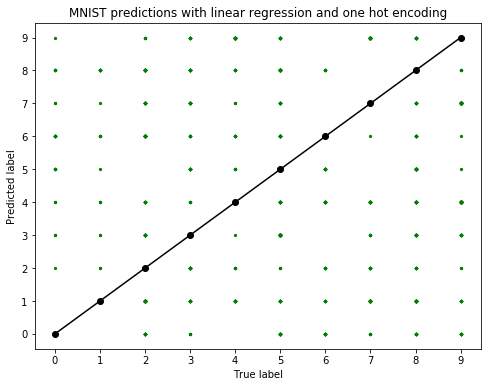

In [58]:
# Distribution of labels in MNIST
plt.figure(figsize=(8, 6))
plt.scatter(mnist_test_label, mnist_predicted_oh, s=5, c='green')
plt.plot(np.arange(0,10), np.arange(0,10), 'k-o')
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('MNIST predictions with linear regression and one hot encoding')
plt.show()

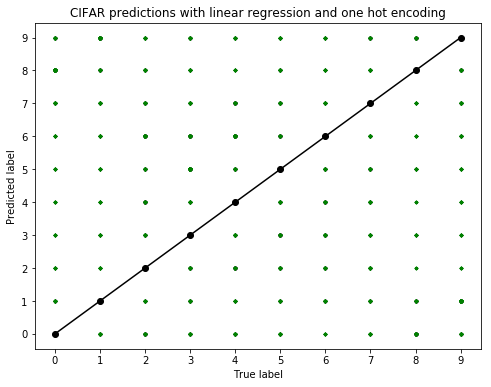

In [59]:
# Distribution of labels in CIFAR
plt.figure(figsize=(8, 6))
plt.scatter(cifar_test['labels'], cifar_predicted_oh, s=5, c='green')
plt.plot(np.arange(0,10), np.arange(0,10), 'k-o')
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('CIFAR predictions with linear regression and one hot encoding')
plt.show()

In [60]:
print("The accuracy with linear regrssion with one hot encoding for the MNIST dataset is",\
      score(mnist_predicted_oh, mnist_test_label)*100, "%" )
print("The accuracy with linear regrssion with one hot encoding for the CIFAR dataset is",\
      score(cifar_predicted_oh, cifar_test['labels'])*100, "%" )

The accuracy with linear regrssion with one hot encoding for the MNIST dataset is 86.04 %
The accuracy with linear regrssion with one hot encoding for the CIFAR dataset is 36.370000000000005 %


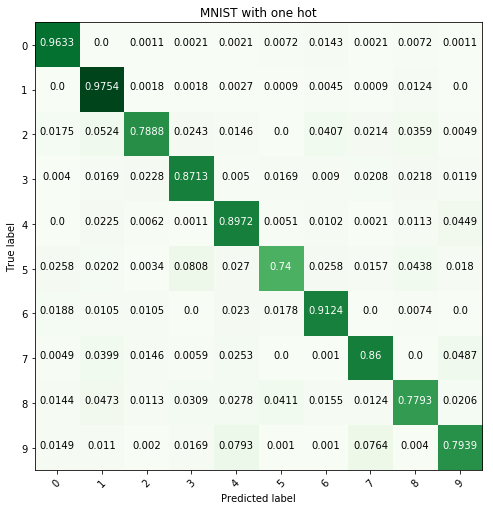

In [61]:
plot_confusion_matrix(list(mnist_test_label),mnist_predicted_oh,range(10), normalize=True, title='MNIST with one hot')

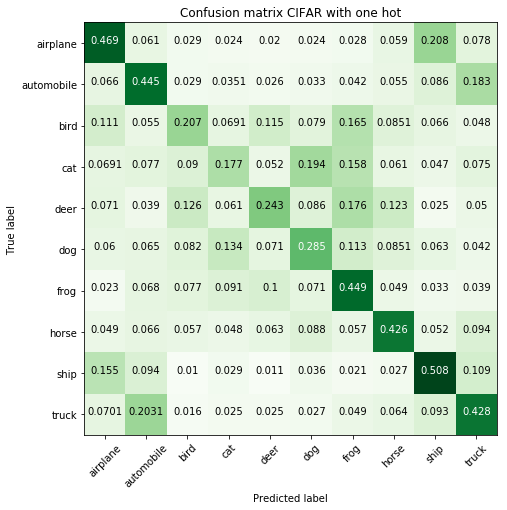

In [62]:
plot_confusion_matrix(cifar_test['labels'],cifar_predicted_oh,\
                      cifar_labels, normalize=True, title='Confusion matrix CIFAR with one hot')

In this way we finally got a pretty good result, at least for the MNIST dataset. It is still far from the s.o.a but we should also consider that this classifier is way faster both in training phase and in classification phase than the ones that can lead to the best results.